## Simulation of SiN loaded LNOI coupler


Thach Nguyen

### This file for calculating the coupling coefficient betwen the Ring and Aux ring

### Importing important python modules

In [239]:
%matplotlib inline

In [240]:
import reme                      # REME module
import numpy as np

### Setting the operating wavelength

In [241]:
wavelength = 1.55e-6             # The waveguide is leaky at this wavelength
reme.set_wavelength(wavelength)

### Defining the material layer thickness parameters

In [242]:
m_linbo3_or = reme.MaterialLiNbO3(cut_axis='X', propagation_axis='Y', polarisation=reme.Polarisation.TM)    # Ordinary index; using built-in Sellmier equation 
m_linbo3_ex = reme.MaterialLiNbO3(cut_axis='X', propagation_axis='Y', polarisation=reme.Polarisation.TE)    # Extradinary index; using built-in Sellmier equation 

m_sin = reme.SellmierMaterial(1, 3.0249, 0.1353406 ** 2, 40314, 1239.842 ** 2, 0, 0,'SiN')  
# Run reme.SellmierMaterial? in a new cell for explantion of parameters when defining material using Sellmier equation
m_sio2 = reme.MaterialSiO2()
m_air = reme.MaterialAir()

In [243]:
# Define anisotropic LiNbO3: X-cut, Y-propagating
m_linbo3_y = reme.AnisotropicMaterialLiNbO3(cut_axis='X', propagation_axis='Y')   # Anisotropic LiNbO3 
m_linbo3_z = reme.AnisotropicMaterialLiNbO3(cut_axis='X', propagation_axis='Z')   # Anisotropic LiNbO3 

In [244]:
t_s = 1.5e-6                    # SiO2 bottom thickness
t_c = 1.5e-6                    # Sio2 cover thickness
t_linbo3 = 0.3e-6             # LNOI film thickness
t_sin = 300e-9                # Unetched SiN film thickness
core_width = 1.0e-6             # Waveguide core width
clad_width = 3e-6 # Simulation window width
gap = 1.05e-6
radius = 230e-6

### Slab modes

### With SiO2 cover

In [245]:
# Changed Air cover to SiO2 cover
# core_te_y = reme.Slab(m_sio2(t_s) + m_linbo3_ex(t_linbo3) + m_sin(t_sin) + m_air(t_s))
# clad_te_y = reme.Slab(m_sio2(t_s) + m_linbo3_ex(t_linbo3) + m_air(t_s + t_sin))
core_te_y = reme.Slab(m_sio2(t_s) + m_linbo3_ex(t_linbo3) + m_sin(t_sin) + m_sio2(t_s))
clad_te_y = reme.Slab(m_sio2(t_s) + m_linbo3_ex(t_linbo3) + m_sio2(t_s + t_sin))
core_te_y.set_TM(False)     # Only consider TE slab modes, no TM slab modes
clad_te_y.set_TM(False)
core_te_y.find_modes()
clad_te_y.find_modes()

In [246]:
n_te_core_y = core_te_y.get_effective_index_TE(0).real
n_te_clad_y = clad_te_y.get_effective_index_TE(0).real

In [247]:
# Changed Air cover to SiO2 cover
# core_tm_y = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_air(t_s))
# clad_tm_y = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_air(t_s + t_sin))
core_tm_y = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_sio2(t_s))
clad_tm_y = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sio2(t_s + t_sin))
core_tm_y.set_TE(False)
clad_tm_y.set_TE(False)

In [248]:
core_tm_y.find_modes()
clad_tm_y.find_modes()

In [249]:
n_tm_core_y = core_tm_y.get_effective_index_TM(0).real
n_tm_clad_y = clad_tm_y.get_effective_index_TM(0).real

In [250]:
n_te_clad_y

1.779696865309212

In [251]:
n_te_core_y

1.9077051715807525

In [252]:
# Changed Air cover to SiO2 cover
# core_te_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_air(t_s))
# clad_te_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_air(t_s + t_sin))
core_te_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_sio2(t_s))
clad_te_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sio2(t_s + t_sin))
core_te_z.set_TM(False)     # Only consider TE slab modes, no TM slab modes
clad_te_z.set_TM(False)
core_te_z.find_modes()
clad_te_z.find_modes()

In [253]:
n_te_core_z = core_te_z.get_effective_index_TE(0).real
n_te_clad_z = clad_te_z.get_effective_index_TE(0).real

In [254]:
# Changed Air cover to SiO2 cover
# core_tm_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_air(t_s))
# clad_tm_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_air(t_s + t_sin))
core_tm_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_sio2(t_s))
clad_tm_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sio2(t_s + t_sin))
core_tm_z.set_TE(False)
clad_tm_z.set_TE(False)

In [255]:
core_tm_z.find_modes()
clad_tm_z.find_modes()

In [256]:
n_tm_core_z = core_tm_y.get_effective_index_TM(0).real
n_tm_clad_z = clad_tm_y.get_effective_index_TM(0).real

In [257]:
n_te_clad_z

1.83846848611742

In [258]:
n_te_core_z

1.9520410843135267

### Simulate 2D waveguide mode

#### Defining a RWG waveguide geometry from core and cladding slabs

We need to use anisotropic LiNbO3 when defining the waveguides

### With SiO2 cover

In [259]:
# Changed Air cover to SiO2 cover
# clad_y = reme.Slab(m_sio2(t_s) + m_linbo3_y(t_linbo3) + m_air(t_s + t_sin))
# core_y = reme.Slab(m_sio2(t_s) + m_linbo3_y(t_linbo3) + m_sin(t_sin) + m_air(t_s))
clad_y = reme.Slab(m_sio2(t_s) + m_linbo3_y(t_linbo3) + m_sio2(t_s + t_sin))
core_y = reme.Slab(m_sio2(t_s) + m_linbo3_y(t_linbo3) + m_sin(t_sin) + m_sio2(t_s))

In [260]:
# Changed Air cover to SiO2 cover
# clad_z = reme.Slab(m_sio2(t_s) + m_linbo3_z(t_linbo3) + m_air(t_s + t_sin))
# core_z = reme.Slab(m_sio2(t_s) + m_linbo3_z(t_linbo3) + m_sin(t_sin) + m_air(t_s))
clad_z = reme.Slab(m_sio2(t_s) + m_linbo3_z(t_linbo3) + m_sio2(t_s + t_sin))
core_z = reme.Slab(m_sio2(t_s) + m_linbo3_z(t_linbo3) + m_sin(t_sin) + m_sio2(t_s))

In [261]:
rwg_z = reme.RWG(clad_z(clad_width) + core_z(core_width) + clad_z(clad_width))

In [262]:
# # View the waveguide structure
# rwg_z.view()

In [263]:
guide_straight_z = reme.FDStraight(rwg_z, 101, 401, cell_averaging=True)
guide_straight_z.set_left_boundary(reme.PEC)        
guide_straight_z.set_right_boundary(reme.PEC)

In [264]:
guide_bent_z = reme.FDBent(rwg_z, 101, 401, cell_averaging=True)
guide_bent_z.set_radius(radius)
guide_bent_z.set_left_boundary(reme.PEC)        
guide_bent_z.set_right_boundary(reme.PEC)

In [265]:
guide_straight_z.find_mode(n_te_core_z)

0

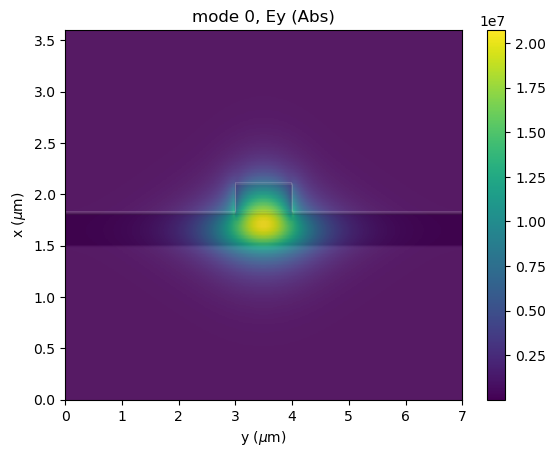

In [266]:
guide_straight_z.plot_mode(0, 'Ey', 'Abs')

In [267]:
neff_straight_z = guide_straight_z.get_mode_effective_index(0).real

In [268]:
guide_bent_z.find_mode(neff_straight_z * 2.0 * np.pi / 1.55e-6 * radius)

0

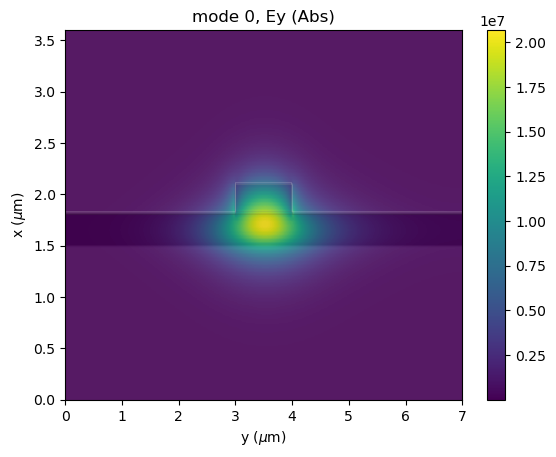

In [269]:
guide_bent_z.plot_mode(0, 'Ey', 'Abs')

### Define the coupler

In [270]:
# Define the coupler section of racetrack ring, it has two waveguide paths: a ring and straight waveguide
coupler = reme.Coupler(2)
# coupler.add_bent_guide(0, guide_bent_z)
coupler.add_straight_guide(0, guide_straight_z)

In [271]:
# The bus waveguide is offset by w+G; For the coupler between two rings you need to add a bent waveguide to path 1 as well (similar to the previous cell)
coupler.add_straight_guide(1, guide_straight_z, core_width + gap)

In [272]:
coupler.set_straight_length(0, 0e-6)
# coupler.set_straight_length(1, 160e-6)
coupler.set_coupler_length(250e-6)
# coupler.set_coupler_length(100e-6)

In [273]:
# Number of cross-secion sampling points used in the integrations
coupler.set_sampling(101, 401)

In [274]:
# Number of propagation steps along z-direction
coupler.set_num_steps(101)

In [275]:
# Calculate the coupler response
coupler.calculate()

In [276]:
print("Coupler transfer ratio: {}".format(abs(coupler.get_S_reduced(0, 0, 0, 0))**2))
print("Coupler coupling ratio: {}".format(abs(coupler.get_S_reduced(1, 0, 0, 0))**2))


Coupler transfer ratio: 0.4896606632313827
Coupler coupling ratio: 0.5105567566183105


In [277]:
# Open a dialog to plot the transfer matrix evolution
#coupler.plot_transfer_matrix()

In [278]:
abs(coupler.get_S_reduced(0, 0, 0, 0))**2 + abs(coupler.get_S_reduced(1, 0, 0, 0))**2

1.0002174198496931

In [980]:
coupler.get_S(0, 0, 0, 0)

(-0.012401644105554601+0.010473574389226453j)

### Scan the straight section length

In [539]:
num_points = 51
lengths1 = np.linspace(0, 250e-6, num_points)
lengths2 = np.linspace(0, 250e-6, num_points)
coupler_cross_coupling_bent_straight1 = np.zeros(num_points)
coupler_straigth_coupling_bent_bent1 = np.zeros(num_points)
coupler_cross_coupling_straight_bent1 = np.zeros(num_points)
coupler_straigth_coupling_straight_straight1 = np.zeros(num_points)

In [540]:
for i in range(num_points):
    coupler.set_straight_length(0, lengths1[i])
    coupler.set_coupler_length(100e-6 + lengths1[i])
    coupler.calculate()
    coupler_cross_coupling_bent_straight1[i] = abs(coupler.get_S_reduced(0, 1, 0, 0))**2
    coupler_straigth_coupling_bent_bent1[i] = abs(coupler.get_S_reduced(0, 0, 0, 0))**2
    coupler_cross_coupling_straight_bent1[i] = abs(coupler.get_S_reduced(1, 0, 0, 0))**2
    coupler_straigth_coupling_straight_straight1[i] = abs(coupler.get_S_reduced(1, 1, 0, 0))**2

In [541]:
#coupler.plot_transfer_matrix()

In [542]:
import matplotlib.pyplot as plt

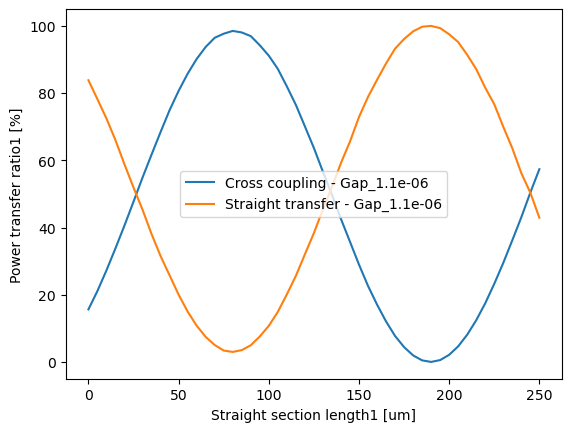

In [543]:
plt.plot( lengths1* 1e6, coupler_cross_coupling_straight_bent1 * 100, label="Cross coupling - Gap_{}".format(gap))
plt.plot( lengths1* 1e6, coupler_straigth_coupling_bent_bent1 * 100, label="Straight transfer - Gap_{}".format(gap))
plt.xlabel("Straight section length1 [um]")
plt.ylabel("Power transfer ratio1 [%]")
plt.legend()
plt.show()

In [544]:
num_points = 51
lengths2 = np.linspace(0, 300e-6, num_points)
coupler_cross_coupling_bent_straight2 = np.zeros(num_points)
coupler_straigth_coupling_bent_bent2 = np.zeros(num_points)
coupler_cross_coupling_straight_bent2 = np.zeros(num_points)
coupler_straigth_coupling_straight_straight2 = np.zeros(num_points)

In [545]:
for i in range(num_points):
    coupler.set_straight_length(0, lengths2[i])
    coupler.set_coupler_length(100e-6 + lengths2[i])
    coupler.calculate()
    coupler_cross_coupling_bent_straight2[i] = abs(coupler.get_S_reduced(0, 1, 0, 0))**2
    coupler_straigth_coupling_bent_bent2[i] = abs(coupler.get_S_reduced(0, 0, 0, 0))**2
    coupler_cross_coupling_straight_bent2[i] = abs(coupler.get_S_reduced(1, 0, 0, 0))**2
    coupler_straigth_coupling_straight_straight2[i] = abs(coupler.get_S_reduced(1, 1, 0, 0))**2

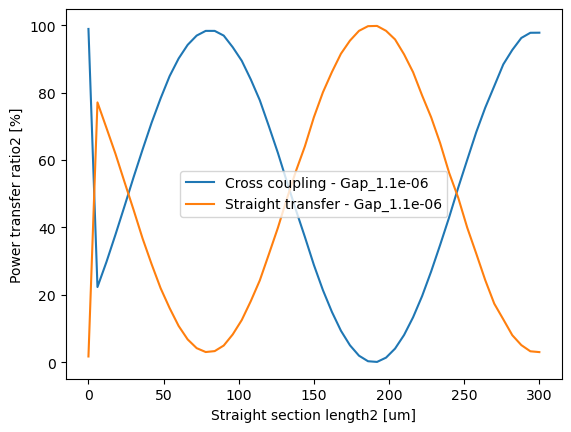

In [546]:
plt.plot( lengths2* 1e6, coupler_cross_coupling_straight_bent2 * 100, label="Cross coupling - Gap_{}".format(gap))
plt.plot( lengths2* 1e6, coupler_straigth_coupling_bent_bent2 * 100, label="Straight transfer - Gap_{}".format(gap))
plt.xlabel("Straight section length2 [um]")
plt.ylabel("Power transfer ratio2 [%]")
plt.legend()
plt.show()

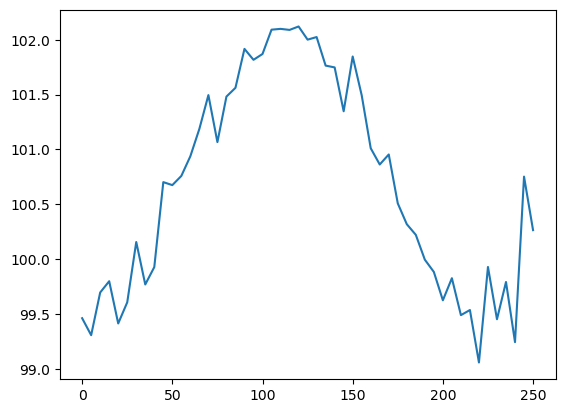

In [547]:
plt.plot(lengths1 * 1e6, (coupler_cross_coupling_straight_bent1 + coupler_straigth_coupling_bent_bent1) * 100, label="Cross coupling- Gap_{}".format(gap))
plt.show()

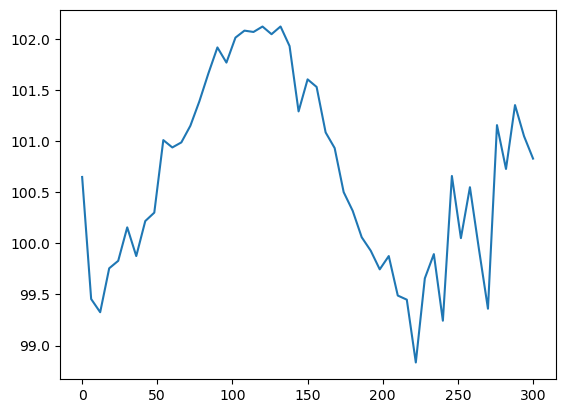

In [548]:
plt.plot(lengths2 * 1e6, (coupler_cross_coupling_straight_bent2 + coupler_straigth_coupling_bent_bent2) * 100, label="Cross coupling- Gap_{}".format(gap))
plt.show()

### Coupler length to achieve critical coupling

Bending radius: 300um

Straight section length: 160um

For different loss values

In [549]:
straight_section_length = 160e-6

In [550]:
def round_trip_power_transmission(propagation_loss):
    loss = (2.0 * np.pi * radius + straight_section_length * 2.0) * 100 * propagation_loss
    return 10.0 ** (-loss / 10)    

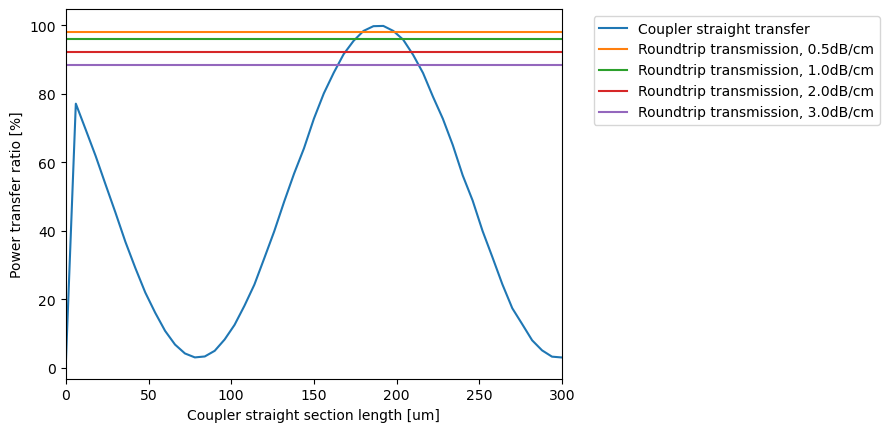

In [551]:
plt.plot(lengths2 * 1e6, coupler_straigth_coupling_bent_bent2 * 100, label="Coupler straight transfer")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(0.5) * 100 for x in lengths2], label="Roundtrip transmission, 0.5dB/cm")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(1.0) * 100 for x in lengths2], label="Roundtrip transmission, 1.0dB/cm")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(2.0) * 100 for x in lengths2], label="Roundtrip transmission, 2.0dB/cm")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(3.0) * 100 for x in lengths2], label="Roundtrip transmission, 3.0dB/cm")
plt.xlim(0, 300)
plt.xlabel("Coupler straight section length [um]")
plt.ylabel("Power transfer ratio [%]")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [552]:
a = reme.FMMBent(rwg_z)

In [553]:
# a.find_modes?